In [3]:
import xarray as xr
from matplotlib import pyplot as plt
import numpy as np
from cartopy import crs as ccrs
import pandas as pd
#import dask
import netCDF4
import xesmf as xe

In [ ]:
# Noah day and ERA5 plotted 
# Karstens not working - dont think file is netcdf format (need to look if there is another file)

In [ ]:
# For Noah day - (insert url when you remember)

In [24]:
# NOT WORKING   
# # Load data from the provided NetCDF files
# with xr.open_dataset(r'C:\Users\wilse\Documents\Final_project\traceRadon_rnflux_GLDAS-Noah_day_2022_v0.6.nc') as f:
#     noah_day = f.load()

# # Convert Unix epoch timestamps to datetime objects
# timestamps = noah_day['time'].values
# noah_day['time'] = pd.to_datetime(timestamps, unit='s')

# # Load an example NAME grid from a footprint file
# with xr.open_dataset(r'C:\Users\wilse\Documents\Final_project\RGL-90magl_UKV_rn_EUROPE_202002.nc') as f:
#     ds_fp_rn = f.load()

# # Add latitude and longitude coordinates to noah_day if not present
# if 'latitude' not in noah_day.coords:
#     noah_day.coords['latitude'] = (('lat', 'lon'), np.random.rand(780, 860))  # Replace with actual latitude values
# if 'longitude' not in noah_day.coords:
#     noah_day.coords['longitude'] = (('lat', 'lon'), np.random.rand(780, 860))  # Replace with actual longitude values

# # Add latitude and longitude coordinates to ds_fp_rn if not present
# if 'lat' not in ds_fp_rn.coords:
#     ds_fp_rn.coords['lat'] = np.linspace(33, 72, 780)
# if 'lon' not in ds_fp_rn.coords:
#     ds_fp_rn.coords['lon'] = np.linspace(-11, 32, 860)

# # Perform regridding using xesmf without reuse_weights
# regridder = xe.Regridder(noah_day.squeeze(), ds_fp_rn.squeeze(), 'conservative')
# ds_flux_rn_regrid = regridder(noah_day.squeeze())

# # Replace NaNs with zeros
# ds_flux_rn_regrid = ds_flux_rn_regrid.fillna(0)

In [25]:
#STILL NOT WORKING
# # Load data from the provided NetCDF files
# with xr.open_dataset(r'C:\Users\wilse\Documents\Final_project\traceRadon_rnflux_GLDAS-Noah_day_2022_v0.6.nc') as f:
#     noah_day = f.load()

# # Convert Unix epoch timestamps to datetime objects
# timestamps = noah_day['time'].values
# noah_day['time'] = pd.to_datetime(timestamps, unit='s')

# # Load an example NAME grid from a footprint file
# with xr.open_dataset(r'C:\Users\wilse\Documents\Final_project\RGL-90magl_UKV_rn_EUROPE_202002.nc') as f:
#     ds_fp_rn = f.load()

# # Define the new grid
# ds_out = xr.Dataset({'lat': (['lat'], np.linspace(33, 72, 293)),
#                      'lon': (['lon'], np.linspace(-11, 32, 391))})

# # Create regridder
# regridder = xe.Regridder(noah_day.squeeze(), ds_out, 'conservative', reuse_weights=False)

# # Perform regridding
# ds_flux_rn_regrid = regridder(noah_day.squeeze())

# # Replace NaNs with zeros
# ds_flux_rn_regrid = ds_flux_rn_regrid.fillna(0)

In [20]:
# Dont really know why this one worked and the other didnt but it worked
# I will not be complaining
# using this method for the other flux datasets - hopefully will work for them too 
# Load data from the provided NetCDF files
with xr.open_dataset(r'C:\Users\wilse\Documents\Final_project\traceRadon_rnflux_GLDAS-Noah_day_2022_v0.6.nc') as f:
    noah_day = f.load()

# Convert Unix epoch timestamps to datetime objects
timestamps = noah_day['time'].values
noah_day['time'] = pd.to_datetime(timestamps, unit='s')

# Load an example NAME grid from a footprint file
with xr.open_dataset(r'C:\Users\wilse\Documents\Final_project\RGL-90magl_UKV_rn_EUROPE_202002.nc') as f:
    ds_fp_rn = f.load()

# Define the new grid
ds_out = xr.Dataset({'lat': (['lat'], np.linspace(33, 72, 293)),
                     'lon': (['lon'], np.linspace(-11, 32, 391))})

# Perform regridding using linear interpolation
ds_flux_rn_regrid = noah_day.interp(coords={'lat': ds_out['lat'], 'lon': ds_out['lon']}, method='linear')

# Replace NaNs with zeros
ds_flux_rn_regrid = ds_flux_rn_regrid.fillna(0)

In [21]:
ds_flux_rn_regrid

<xarray.Dataset>
Dimensions:  (time: 365, lat: 293, lon: 391)
Coordinates:
  * time     (time) datetime64[ns] 2022-01-01 2022-01-02 ... 2022-12-31
  * lat      (lat) float64 33.0 33.13 33.27 33.4 33.53 ... 71.6 71.73 71.87 72.0
  * lon      (lon) float64 -11.0 -10.89 -10.78 -10.67 ... 31.67 31.78 31.89 32.0
Data variables:
    rn_flux  (time, lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes: (12/17)
    title:                      traceRadon radon flux map for Europe (based o...
    comment:                    not yet fully validated results
    creator:                    Ute Karstens, ICOS ERIC - Carbon Portal,  orc...
    institution:                ICOS ERIC - Carbon Portal, Physical Geography...
    project:                    19ENV01 traceRadon, EMPIR programme
    contact:                    Ute Karstens, ICOS ERIC - Carbon Portal, ute....
    ...                         ...
    source:                     Process-based radon flux model (Karstens et a...
    crs:                        spherical earth with radius of 6367.47 km
    geospatial_lat_resolution:  0.05 degree
    geospatial_lon_resolution:  0.05 degree
    frequency:                  day
    summary:                    Daily radon flux map based on soil uranium co...

c:\Users\wilse\Miniconda3\envs\Conda_env\lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


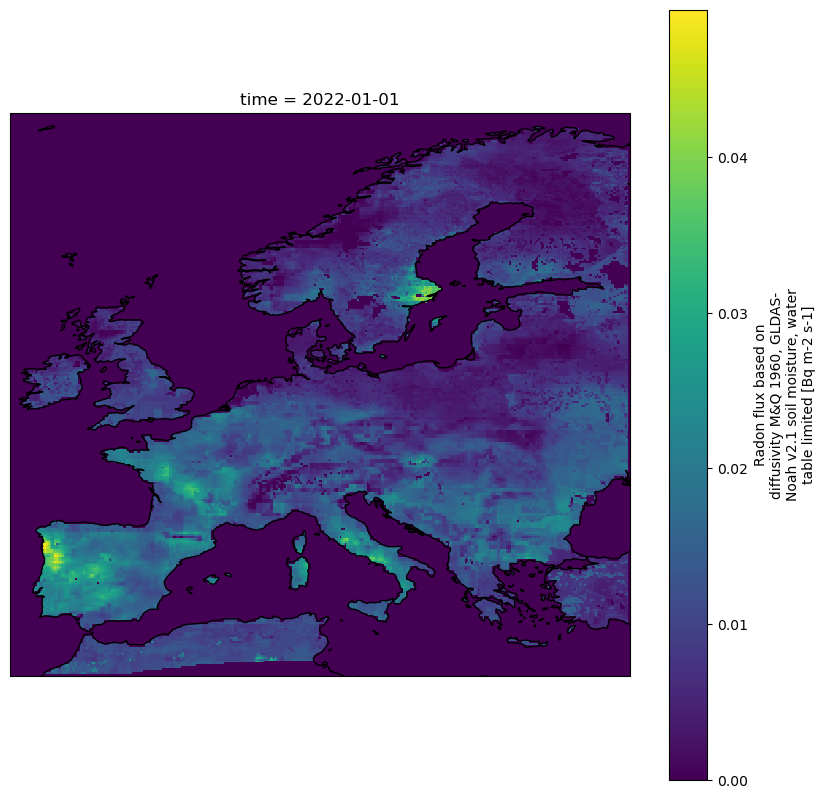

In [23]:
# Plot the regridded radon flux
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

# Select data based on timestamp or index position
# Option 1: Select by timestamp
# ds_flux_rn_regrid['rn_flux'].sel(time="2006-01-01").plot(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis')

# Option 2: Select by index position
ds_flux_rn_regrid['rn_flux'].isel(time=0).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis')

plt.show()

In [ ]:
# for Karstens_2015 radon data

In [8]:
#Think Karstens file may not be in netcdf4 format 
# Going to change the code to make it into a pandas array to see if that works?
# Similar problems appearing to the corrupted file of rgl in thew first week 
# looking on the site again to see if im being blonde and if its in a different format online

In [9]:
# Karstens

with xr.open_dataset(r'C:\Users\wilse\Documents\Final_project\Karstens_2015.tab') as f:
    karstens = f.load()

# Convert Unix epoch timestamps to datetime objects
timestamps = karstens['time'].values
karstens['time'] = pd.to_datetime(timestamps, unit='s')

# Load an example NAME grid from a footprint file
with xr.open_dataset(r'C:\Users\wilse\Documents\Final_project\RGL-90magl_UKV_rn_EUROPE_202002.nc') as f:
    ds_fp_rn = f.load()

# Define the new grid
ds_output = xr.Dataset({'lat': (['lat'], np.linspace(33, 72, 293)),
                     'lon': (['lon'], np.linspace(-11, 32, 391))})

# Perform regridding using linear interpolation
ds_flux_rn_regrid_k = karstens.interp(coords={'lat': ds_output['lat'], 'lon': ds_output['lon']}, method='linear')

# Replace NaNs with zeros
ds_flux_rn_regrid_k = ds_flux_rn_regrid_k.fillna(0)

ValueError: did not find a match in any of xarray's currently installed IO backends ['netcdf4', 'scipy']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html
https://docs.xarray.dev/en/stable/user-guide/io.html

In [5]:
# ERA5 data 2006 - 2022 (find link to data when youi have the chance)

with xr.open_dataset(r'C:\Users\wilse\Documents\Final_project\traceRadon_rnflux_ERA5-Land_month_2006-2022_v0.6.nc') as f:
    era5 = f.load()

# Convert Unix epoch timestamps to datetime objects
timestamps = era5['time'].values
era5['time'] = pd.to_datetime(timestamps, unit='s')

# Load an example NAME grid from a footprint file
with xr.open_dataset(r'C:\Users\wilse\Documents\Final_project\RGL-90magl_UKV_rn_EUROPE_202002.nc') as f:
    ds_fp_rn = f.load()

# Define the new grid
ds_out1 = xr.Dataset({'lat': (['lat'], np.linspace(33, 72, 293)),
                     'lon': (['lon'], np.linspace(-11, 32, 391))})

# Perform regridding using linear interpolation
ds_flux_rn_regrid1 = era5.interp(coords={'lat': ds_out1['lat'], 'lon': ds_out1['lon']}, method='linear')

# Replace NaNs with zeros
ds_flux_rn_regrid1 = ds_flux_rn_regrid1.fillna(0)

In [6]:
ds_flux_rn_regrid1

<xarray.Dataset>
Dimensions:  (time: 204, lat: 293, lon: 391)
Coordinates:
  * time     (time) datetime64[ns] 2006-01-01 2006-02-01 ... 2022-12-01
  * lat      (lat) float64 33.0 33.13 33.27 33.4 33.53 ... 71.6 71.73 71.87 72.0
  * lon      (lon) float64 -11.0 -10.89 -10.78 -10.67 ... 31.67 31.78 31.89 32.0
Data variables:
    rn_flux  (time, lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes: (12/17)
    title:                      traceRadon radon flux map for Europe (based o...
    comment:                    not yet fully validated results
    creator:                    Ute Karstens, ICOS ERIC - Carbon Portal,  orc...
    institution:                ICOS ERIC - Carbon Portal, Physical Geography...
    project:                    19ENV01 traceRadon, EMPIR programme
    contact:                    Ute Karstens, ICOS ERIC - Carbon Portal, ute....
    ...                         ...
    source:                     Process-based radon flux model (Karstens et a...
    crs:                        spherical earth with radius of 6367.47 km
    geospatial_lat_resolution:  0.05 degree
    geospatial_lon_resolution:  0.05 degree
    frequency:                  mon
    summary:                    Monthly radon flux map based on soil uranium ...

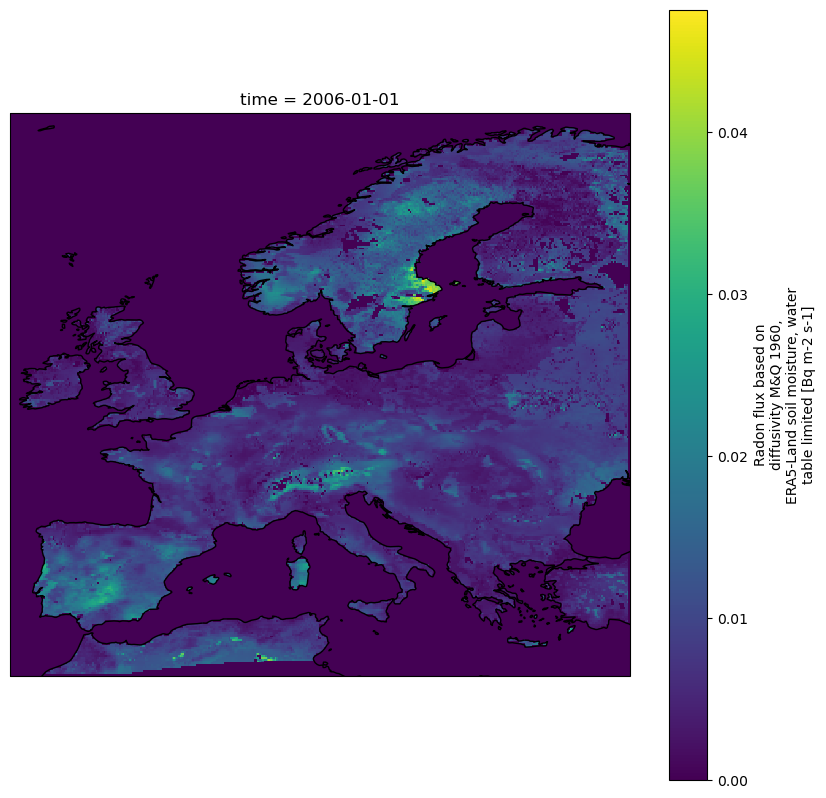

In [7]:
# Plot the regridded radon flux
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

# Select by index position
ds_flux_rn_regrid1['rn_flux'].isel(time=0).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis')

plt.show()